In [1]:
pwd

'/global/cscratch1/sd/krzywins/CrystalBPM5/crystal-fft-bpm/examples'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams['figure.figsize'] = (8,7)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [8]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
import XCrTools as tools
omega0 = 12800.0

xcr = XCrystal(XCr_path+'/config/C333._Omega12p8keV_waist250um.yaml', omega0)
xtools = tools.XCrTools(xcr)



In [9]:
pwd

'/global/cscratch1/sd/krzywins/CrystalBPM5/crystal-fft-bpm/examples'

In [10]:
ls ru*

run_24_16_angleC400_9p8keV_waist_250_microns.npy
run_24_16_angle_C_333_12800_eV_waist_500um_crystal_thikcness100um.npy
run_24_16_angle_Si_400_9000_eV.npy
run_24_16_angle_Si_444_8048_eV.npy
run_omega_U1_26_16_C333_12800_eVm6p0urad10fstmax1300xgrid2400Corr2waist250zsep100Thickness100um.npy
run_omega_U1_26_16_C333_12800_eVm6p0urad10fstmax1300xgrid2400Corr2waist250zsep100Thickness50um.npy
run_omega_U2_26_16_C333_12800_eVm6p0urad10fstmax1300xgrid2400Corr2waist250zsep100Thickness100um.npy
run_omega_U2_26_16_C333_12800_eVm6p0urad10fstmax1300xgrid2400Corr2waist250zsep100Thickness50um.npy
run_parallel-omegaC333F.py
run_parallel_angleC400_9831eV.py
run_parallel_angleSi400_9pkeV.py
run_parallel_angleSi444_8048eV.py
run_parallel_angle_C333_12800eV.py


In [11]:
U1file = 'run_omega_U1_26_16_C333_12800_eVm6p0urad10fstmax1300xgrid2400Corr2waist250zsep100Thickness50um.npy'
U2file = 'run_omega_U2_26_16_C333_12800_eVm6p0urad10fstmax1300xgrid2400Corr2waist250zsep100Thickness50um.npy'


U1_wxyz = np.load(U1file)
U2_wxyz = np.load(U2file)

In [12]:
U1_wxyz.shape


(416, 2400, 1, 34)

In [13]:
IJ=33

Text(0, 0.5, '$\\Delta \\omega$ (eV)')

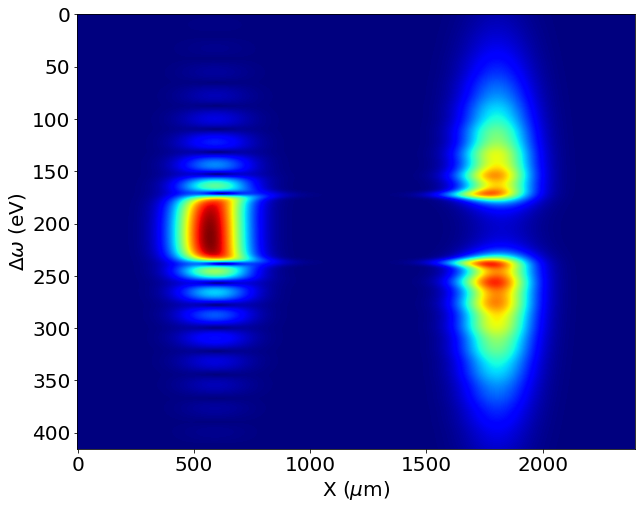

In [14]:
#extent = [0, xcr.xxmax / xcr.convr * 1e6, np.max(w_sim), np.min(w_sim)]
#GnBu
plt.figure(figsize=(10,8))
plt.imshow(np.abs(U1_wxyz[:,:,0,IJ])**1 + np.abs(U2_wxyz[:,:,0,IJ])**1, aspect='auto', cmap='jet')
plt.xlabel(r'X ($\mu$m)')
plt.ylabel(r'$\Delta \omega$ (eV)')
#plt.plot(100*XOPdata[:,1], dw, '-', linewidth=2.1, color='red')
#plt.plot(np.abs(E_wxy_padded[:, 1600, 5])*3e4, w, '-.', color='blue')

#U1_wxyz#plt.ylim(-0.5, 0.5)

In [15]:
U1_wx = U1_wxyz[:, :, 0, IJ]
U2_wx = U2_wxyz[:, :, 0, IJ]

pad_shape = [(0, 0), (0, 0)]
U1_wx_padded = xtools.my_pad(U1_wx, pad_shape)
U2_wx_padded = xtools.my_pad(U2_wx, pad_shape)
#U1_tx = np.fft.fftshift(np.fft.ifft(U1_wx_padded, axis=0), axes=0)
#U2_tx = np.fft.fftshift(np.fft.ifft(U2_wx_padded, axis=0), axes=0)
U1_tx = np.fft.ifft(U1_wx_padded, axis=0)
U2_tx = np.fft.ifft(U2_wx_padded, axis=0)

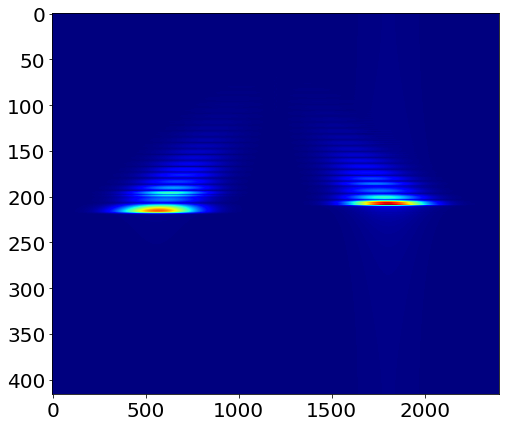

In [16]:
fig, ax = plt.subplots()
ax.imshow(np.abs(U2_tx)**0.6+np.abs(U1_tx)**0.6, aspect='auto', cmap='jet')
ax.set_xlim()
ax.set_ylim()
plt.show()

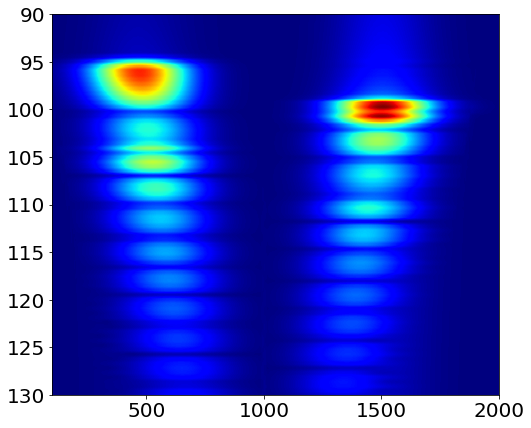

In [17]:
xcr.configure(0)
fig, ax = plt.subplots()
ax.imshow(np.abs(U2_tx)**0.4*1+np.abs(U1_tx)**0.4*1,extent=[0, xcr.xxmax / xcr.convr * 1e6, 0, 200], aspect='auto', cmap='jet')

ax.set_xlim(100,2000)
ax.set_ylim(130, 90)
plt.show()

In [18]:
xcr.configure(0)
1258/60

20.966666666666665

In [116]:
xcr.xxmax/xcr.convr

0.0024

#### extent = [0, xcr.xxmax / xcr.convr * 1e6, np.max(w_sim), np.min(w_sim)]
#GnBu
plt.figure(figsize=(10,8))
plt.imshow(np.abs(U2_wxyz[:,:,0,31])**1, aspect='auto', cmap='jet')
plt.xlabel(r'X ($\mu$m)')
plt.ylabel(r'$\Delta \omega$ (eV)')
#plt.plot(100*XOPdata[:,1], dw, '-', linewidth=2.1, color='red')
#plt.plot(np.abs(E_wxy_padded[:, 1600, 5])*3e4, w, '-.', color='blue')

#U1_wxyz#plt.ylim(-0.5, 0.5)

Text(0, 0.5, '$\\Delta \\omega$ (eV)')

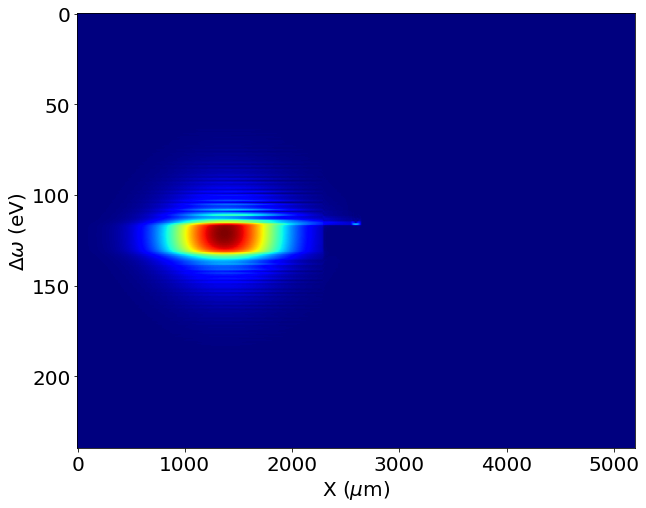

In [17]:
#extent = [0, xcr.xxmax / xcr.convr * 1e6, np.max(w_sim), np.min(w_sim)]
#GnBu
plt.figure(figsize=(10,8))
plt.imshow(np.abs(U1_wxyz[:,:,0,31])**1, aspect='auto', cmap='jet')
plt.xlabel(r'X ($\mu$m)')
plt.ylabel(r'$\Delta \omega$ (eV)')
#plt.plot(100*XOPdata[:,1], dw, '-', linewidth=2.1, color='red')
#plt.plot(np.abs(E_wxy_padded[:, 1600, 5])*3e4, w, '-.', color='blue')

#U1_wxyz#plt.ylim(-0.5, 0.5)